# Predicting Mental Health Illness

In [233]:
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sns
%matplotlib inline
os.getcwd()
from sklearn.model_selection import train_test_split
from IPython.display import display 
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt
import statistics
import copy
from sklearn.model_selection import KFold 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import pickle

In [234]:
os.getcwd()

'C:\\Users\\NanjHen.NHIS\\Documents\\Henry.Nanji1\\Portfolio\\PredictingDepression\\PREDICTINGMH\\notebooks'

In [235]:
df = pd.read_csv('analysis_data_set.csv')
df.head(5)

data = copy.deepcopy(df)

In [236]:
# Get column names
df.columns

Index(['Unnamed: 0', 'age', 'marital_status', 'education_level',
       'number_of_children', 'smoking_status', 'physical_activity_level',
       'employment_status', 'income', 'alcohol_consumption', 'dietary_habits',
       'sleep_patterns', 'history_of_mental_illness',
       'history_of_substance_abuse', 'family_history_of_depression',
       'chronic_medical_conditions', 'agecat', 'incomecat', 'smoking2cat',
       'alcohol.cat'],
      dtype='object')

In [237]:
#drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'agecat', 'incomecat','smoking2cat',
       'alcohol.cat'])

# Data preparation

In [238]:
len(df)

194622

# Target variable

history_of_mental_illnesss: Whether the individual had history or mental health or nots. 1/0

In [166]:
#  check the distribution of values of history of mental health(check for imbalance data set.
# data set is imbalanced, need to do upsampling or downsampling
df['history_of_mental_illness'].value_counts(normalize = True)
# we see, the patient dont have depression

history_of_mental_illness
0    0.69355
1    0.30645
Name: proportion, dtype: float64

In [167]:
df['history_of_mental_illness'].isnull().value_counts()

history_of_mental_illness
False    194622
Name: count, dtype: int64

In [168]:
# identifying categorical and numerical columns

In [169]:
categorical = ['marital_status', 'education_level', 'number_of_children',
       'smoking_status', 'physical_activity_level', 'employment_status',
        'alcohol_consumption', 'dietary_habits', 'sleep_patterns',
        'history_of_substance_abuse',
       'family_history_of_depression', 'chronic_medical_conditions']
numerical = ['age', 'income']

In [170]:
# checking unique values for categorical coluns
df[categorical].nunique()

marital_status                  4
education_level                 5
number_of_children              5
smoking_status                  3
physical_activity_level         3
employment_status               2
alcohol_consumption             3
dietary_habits                  3
sleep_patterns                  3
history_of_substance_abuse      2
family_history_of_depression    2
chronic_medical_conditions      2
dtype: int64

In [171]:
# Feature importance

In [172]:
global_mean = df.history_of_mental_illness.mean()
for col in categorical:                                           
    df_group =df.groupby(by=col).history_of_mental_illness.agg(['mean'])   
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)      

,mean,diff,risk
marital_status,,,
1,0.296875,-0.009575,0.968754
2,0.307479,0.001029,1.003358
3,0.313076,0.006625,1.021620
4,0.293769,-0.012681,0.958620


,mean,diff,risk
education_level,,,
1,0.336842,0.030392,1.099173
2,0.333908,0.027457,1.089598
3,0.279857,-0.026593,0.913222
4,0.281227,-0.025224,0.917690
5,0.283331,-0.023119,0.924559


,mean,diff,risk
number_of_children,,,
0,0.303470,-0.002980,0.990275
1,0.307776,0.001326,1.004326
2,0.308795,0.002345,1.007651
3,0.310667,0.004217,1.013760
4,0.280527,-0.025924,0.915406


,mean,diff,risk
smoking_status,,,
1,0.294124,-0.012326,0.959778
2,0.305988,-0.000462,0.998493
3,0.308440,0.001989,1.006491


,mean,diff,risk
physical_activity_level,,,
1,0.297292,-0.009159,0.970113
2,0.305650,-0.000800,0.997388
3,0.309995,0.003545,1.011567


,mean,diff,risk
employment_status,,,
0,0.393214,0.086764,1.283124
1,0.251027,-0.055423,0.819145


,mean,diff,risk
alcohol_consumption,,,
1,0.302806,-0.003644,0.988109
2,0.304912,-0.001539,0.994979
3,0.314721,0.008270,1.026988


,mean,diff,risk
dietary_habits,,,
0,0.317095,0.010645,1.034736
1,0.306789,0.000338,1.001104
2,0.278883,-0.027567,0.910043


,mean,diff,risk
sleep_patterns,,,
1,0.306414,-0.000037,0.999880
2,0.272418,-0.034032,0.888947
3,0.328327,0.021876,1.071386


,mean,diff,risk
history_of_substance_abuse,,,
0,0.306133,-0.000317,0.998965
1,0.307161,0.000710,1.002318


,mean,diff,risk
family_history_of_depression,,,
0,0.304992,-0.001459,0.995240
1,0.310149,0.003698,1.012068


,mean,diff,risk
chronic_medical_conditions,,,
0,0.304296,-0.002155,0.992969
1,0.310891,0.004440,1.014490


In [173]:
# mutual information
def calculate_mi(series):                                      
    return mutual_info_score(series, df.history_of_mental_illness)     
 
df_mi = df[categorical].apply(calculate_mi)        
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI') 
df_mi

,MI
employment_status,1.117820e-02
education_level,1.773643e-03
sleep_patterns,9.218318e-04
dietary_habits,4.152930e-04
marital_status,7.585078e-05
number_of_children,6.065718e-05
alcohol_consumption,5.454854e-05
physical_activity_level,4.344234e-05
smoking_status,3.831982e-05
chronic_medical_conditions,2.247804e-05


In [174]:
# Correlation coefficient

In [175]:
df[numerical].corrwith(df.history_of_mental_illness)

age       0.02603
income   -0.14563
dtype: float64

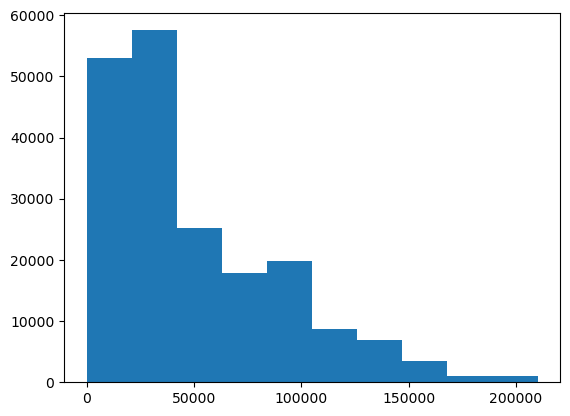

In [176]:
plt.hist(df.income)
plt.show()

In [177]:
df[df.duplicated()]

,age,marital_status,education_level,number_of_children,smoking_status,physical_activity_level,employment_status,income,alcohol_consumption,dietary_habits,sleep_patterns,history_of_mental_illness,history_of_substance_abuse,family_history_of_depression,chronic_medical_conditions


In [178]:
df1 = copy.deepcopy(df)

In [179]:
columns_to_drop = ['marital_status', 'number_of_children',
       'smoking_status', 'physical_activity_level',
        'alcohol_consumption','history_of_substance_abuse',
       'family_history_of_depression', 'chronic_medical_conditions', 'sleep_patterns']

In [180]:
df = df.drop(columns= columns_to_drop)

# data split

In [181]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [182]:
df.to_csv('df_train_ful.csv')
df.to_csv('df_test.csv')

In [183]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)             
y_train = df_train.history_of_mental_illness.values   
y_val = df_val.history_of_mental_illness.values       
 
del df_train['history_of_mental_illness']             
del df_val['history_of_mental_illness']    

In [184]:
# Saving the data sets
#df.to_csv('df_train_ful.csv')
#df.to_csv('df_test.csv')
#df.to_csv('df_train.csv')
#df.to_csv('df_val.csv')
#df.to_csv('y_train.csv')
#df.to_csv('y_val.csv')

In [185]:
df.columns

Index(['age', 'education_level', 'employment_status', 'income',
       'dietary_habits', 'history_of_mental_illness'],
      dtype='object')

# feature engineering  and transformation


In [186]:
categorical = ['education_level','employment_status',
        'dietary_habits']
numerical = ['age', 'income']

In [187]:
# scale numerical columns
sc = StandardScaler()
cols_to_scale = df_train[['age','income']].columns.tolist()
cols_to_scale
df_train.loc[:,cols_to_scale] = sc.fit_transform(df_train.loc[:,cols_to_scale])
# encode cat and numerical columns
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [188]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [189]:
X_train = dv.transform(train_dict)

In [190]:
dv.get_feature_names_out()

array(['age', 'dietary_habits', 'education_level', 'employment_status',
       'income'], dtype=object)

# LR Model

In [191]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [192]:
model.intercept_[0]

-0.44094151280682325

In [193]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'age': -0.003,
 'dietary_habits': -0.027,
 'education_level': -0.039,
 'employment_status': -0.458,
 'income': -0.151}

In [194]:
# apply model to validation data set
cols_to_scale =df_val[['age','income']].columns.tolist()
cols_to_scale
df_val.loc[:,cols_to_scale] = sc.fit_transform(df_val.loc[:,cols_to_scale])  

In [195]:
# encode cat and numerical columns
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val =dv.transform(val_dict)  

In [196]:
# estimate propability on validation set
y_pred = model.predict_proba(X_val)

In [197]:
# probabilities of mental health
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.20684099, 0.38429239, 0.41048505, ..., 0.27455222, 0.28601989,
       0.37551353])

In [198]:
y_pred >= 0.5

array([False, False, False, ..., False, False, False])

In [199]:
# Accuracy

MH = y_pred >= 0.5

(MH == y_val).mean()  

0.6938557054163991

In [200]:
# Now we can loop over different thresholds and check which one gives the best accuracy:

In [201]:
thresholds = np.linspace(0, 1, 11)       
 
for t in thresholds:                     
    MH = y_pred >= t                  
    acc = accuracy_score(y_val, MH)   
    print('%0.3f %0.4f' % (t, acc)) 

0.000 0.3061
0.100 0.3061
0.200 0.3405
0.300 0.6086
0.400 0.6659
0.500 0.6939
0.600 0.6939
0.700 0.6939
0.800 0.6939
0.900 0.6939
1.000 0.6939


In [202]:
# check accuracy of baseline model to see how well it is peforming compared to the fitted model
size_val = len(y_val)                   
baseline = np.repeat(False, size_val)   

In [203]:
accuracy_score(baseline, y_val)

0.6938557054163991

In [204]:
# Because of class imbalannce, accuracy is not the best matrix to use to evaluate the model
# Applying ROC to evaluate the performance of model af varius thresholds

In [205]:
# get AUC
roc_auc_score(y_val, y_pred)

0.603881544084675

# Decision Tree Model

In [206]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict_proba(X_val)[:, 1]
y_pred_tree 



array([0., 0., 1., ..., 0., 0., 0.])

In [207]:
roc_auc_score(y_val, y_pred_tree )

0.5170749533207809

# Random Forest Model

In [208]:
import sklearn.ensemble as sk
clf = sk.RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)

In [209]:
y_pred_clf = clf.predict_proba(X_val)[:, 1]
y_pred_clf 

array([0.05, 0.22, 0.82, ..., 0.14, 0.91, 0.19])

In [210]:
roc_auc_score(y_val, y_pred_clf )

0.5389667362785546

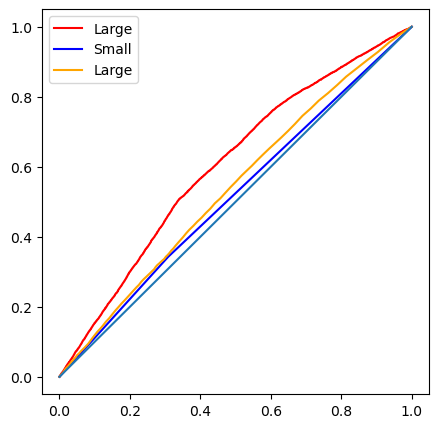

In [211]:
fpr_lr, tpr_lr, _ = roc_curve(y_val, y_pred)
fpr_tree, tpr_tree, _ = roc_curve(y_val, y_pred_tree)
fpr_clf, tpr_clf, _ = roc_curve(y_val, y_pred_clf)
 
plt.figure(figsize=(5, 5))
 
plt.plot(fpr_lr, tpr_lr, color='red', label='Large')
plt.plot(fpr_tree, tpr_tree, color='blue', label='Small')
plt.plot(fpr_clf, tpr_clf, color='orange', label='Large')
plt.plot([0, 1], [0, 1])
plt.legend()

In [212]:
# Logistic regression model is the best with highest AUC
# Fit the model with variables with highest MI

In [213]:
df1

,age,marital_status,education_level,number_of_children,smoking_status,physical_activity_level,employment_status,income,alcohol_consumption,dietary_habits,sleep_patterns,history_of_mental_illness,history_of_substance_abuse,family_history_of_depression,chronic_medical_conditions
0,18,1,1,0,2,1,1,36243.89,2,0,2,0,0,0,0
1,18,1,1,0,3,2,1,30572.11,2,0,2,0,0,1,0
2,18,1,1,0,2,1,0,28757.39,3,0,3,1,0,1,0
3,18,1,1,0,1,1,1,24127.58,3,0,1,1,1,0,0
4,18,1,1,0,3,2,1,38191.53,1,1,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194617,80,3,3,2,3,2,0,10660.86,1,2,3,0,0,1,0
194618,80,3,3,2,3,2,0,3453.10,1,1,1,0,0,1,1
194619,80,3,5,1,3,3,1,128807.63,2,0,2,0,1,1,0
194620,80,3,4,2,2,2,1,108060.04,1,1,2,0,0,0,1


In [140]:
df2 = df1[['education_level', 'employment_status','income','history_of_mental_illness']]
df2

,education_level,employment_status,income,history_of_mental_illness
0,1,1,36243.89,0
1,1,1,30572.11,0
2,1,0,28757.39,1
3,1,1,24127.58,1
4,1,1,38191.53,0
...,...,...,...,...
194617,3,0,10660.86,0
194618,3,0,3453.10,0
194619,5,1,128807.63,0
194620,4,1,108060.04,0


In [56]:
#col_to_drop = ['marital_status', 'number_of_children',
  #     'smoking_status', 'physical_activity_level',
   #     'alcohol_consumption','history_of_substance_abuse',
   #    'family_history_of_depression', 'chronic_medical_conditions','age','dietary_habits', 'sleep_patterns']

#df2 = df1.drop(columns=col_to_drop)

In [141]:
df_train_full2, df_test2 = train_test_split(df2, test_size=0.2, random_state=1)
df_train2, df_val2 = train_test_split(df_train_full2, test_size=0.33, random_state=11)             
y_train2 = df_train2.history_of_mental_illness.values   
y_val2 = df_val2.history_of_mental_illness.values 


In [142]:
categorical2 = [ 'education_level', 'employment_status']
numerical2 = ['income']

In [143]:
# scale numerical columns
sc = StandardScaler()
cols_to_scale2 = df_train2[['income']].columns.tolist()
cols_to_scale2
df_train2.loc[:,cols_to_scale2] = sc.fit_transform(df_train2.loc[:,cols_to_scale2])

In [144]:
# scale numerical columns

# encode cat and numerical columns
train_dict2 = df_train2[categorical2 + numerical2].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict2)

X_train2 = dv.transform(train_dict2)

In [145]:
model2 = LogisticRegression(solver='liblinear', random_state=1)
model2.fit(X_train2, y_train2)

LogisticRegression(random_state=1, solver='liblinear')

In [146]:
cols_to_scale2 =df_val2[['income']].columns.tolist()
cols_to_scale2
df_val2.loc[:,cols_to_scale2] = sc.fit_transform(df_val2.loc[:,cols_to_scale2]) 
# encode cat and numerical columns
val_dict2 = df_val2[categorical2 + numerical2].to_dict(orient='records')
X_val2 =dv.transform(val_dict2)  

In [148]:
y_pred2 = model2.predict_proba(X_val2)[:, 1]
y_pred2
roc_auc_score(y_val, y_pred2)

0.6040016915059309

In [149]:
# Fited model

In [150]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [ ]:
#  Finding best parameters

In [151]:
def train(df, y, C):                                             
    cat = df[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
 
    X = dv.transform(cat)
 
    model = LogisticRegression(solver='liblinear', C=C)          
    model.fit(X, y)
 
    return dv, model

In [66]:
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')   
 
    X = dv.transform(cat)                                         
    y_pred = model.predict_proba(X)[:, 1]                         
 
    return y_pred

In [67]:
def predict_single(customer, dv, model):    
    X = dv.transform([customer])            
    y_pred = model.predict_proba(X)[:, 1]   
    return y_pred[0]   

In [68]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)
 
for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []
 
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]
 
        y_train = df_train.history_of_mental_illness.values
        y_val = df_val.history_of_mental_illness.values
 
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
  
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
 
    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.591 ± 0.003
C=0.01, auc = 0.591 ± 0.003
C=0.1, auc = 0.591 ± 0.003
C=0.5, auc = 0.591 ± 0.003
C=1, auc = 0.591 ± 0.003
C=10, auc = 0.591 ± 0.003


# serilisation and decerilisation

In [152]:
# serialization & deserialization
with open('MH-Model.bin', 'wb') as f_out: 
    pickle.dump((dv, model), f_out)   

In [153]:
#deserialization
with open('MH-Model.bin', 'rb') as f_in:    
    dv, model = pickle.load(f_in)  

In [239]:
df2 = data[['education_level', 'employment_status','income','history_of_mental_illness','income']]
df2

,education_level,employment_status,income,history_of_mental_illness,income
0,1,1,36243.89,0,36243.89
1,1,1,30572.11,0,30572.11
2,1,0,28757.39,1,28757.39
3,1,1,24127.58,1,24127.58
4,1,1,38191.53,0,38191.53
...,...,...,...,...,...
194617,3,0,10660.86,0,10660.86
194618,3,0,3453.10,0,3453.10
194619,5,1,128807.63,0,128807.63
194620,4,1,108060.04,0,108060.04


In [240]:
df2['income'] = np.where(df2['income'] > 35880 , 1, 0)

C:\Users\NanjHen.NHIS\AppData\Local\Temp\ipykernel_23980\149287858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['income'] = np.where(df2['income'] > 35880 , 1, 0)


In [232]:
df2['income'].median()

income    35880.335
income    35880.335
dtype: float64

In [241]:
df2

,education_level,employment_status,income,history_of_mental_illness,income
0,1,1,1,0,1
1,1,1,0,0,0
2,1,0,0,1,0
3,1,1,0,1,0
4,1,1,1,0,1
...,...,...,...,...,...
194617,3,0,0,0,0
194618,3,0,0,0,0
194619,5,1,1,0,1
194620,4,1,1,0,1


In [247]:

df_train_full2, df_test2 = train_test_split(df2, test_size=0.2, random_state=1)
df_train2, df_val2 = train_test_split(df_train_full2, test_size=0.33, random_state=11)             
y_train2 = df_train2.history_of_mental_illness.values   
y_val2 = df_val2.history_of_mental_illness.values 

categorical2 = [ 'education_level', 'employment_status']
#numerical2 = ['']

# scale numerical columns
#sc = StandardScaler()
#cols_to_scale2 = df_train2[['']].columns.tolist()
#cols_to_scale2
#df_train2.loc[:,cols_to_scale2] = sc.fit_transform(df_train2.loc[:,cols_to_scale2])

# encode cat and numerical columns
train_dict2 = df_train2[categorical2].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict2)

X_train2 = dv.transform(train_dict2)

model2 = LogisticRegression(solver='liblinear', random_state=1)
model2.fit(X_train2, y_train2)

#cols_to_scale2 =df_val2[['']].columns.tolist()
#cols_to_scale2
#df_val2.loc[:,cols_to_scale2] = sc.fit_transform(df_val2.loc[:,cols_to_scale2]) 
# encode cat and numerical columns
val_dict2 = df_val2[categorical2].to_dict(orient='records')
X_val2 =dv.transform(val_dict2) 

y_pred2 = model2.predict_proba(X_val2)[:, 1]
y_pred2
roc_auc_score(y_val, y_pred2) 

0.6031570423400566